# Analyzing NASA's Technology Projects: Trends and Predictions

## Author: 
- **Anuj Kumar Shah**
- **Mohit Kosekar**
- **Prudhvi Krishna Dadi**



## Abstract

This project employs a suite of machine learning models, including Naive Bayes, SVM, Random Forest, and XGBoost, complemented by ensemble methods, to analyze over 16,800 records from NASA's TechPort database. The primary aim is to identify prevailing technology themes and predict future trends within NASA's technological projects. By applying both supervised and unsupervised learning techniques, the project classifies these projects into distinct technological categories and forecasts potential areas of growth and innovation. This approach not only enhances the predictive accuracy but also provides a deeper understanding of the strategic directions within NASA's project portfolio. Key findings from this analysis could be instrumental in guiding NASA's future project orientations and strategic decisions, potentially influencing resource allocation and policy formulation in aerospace technology. The insights gained could also enrich STEM education by presenting real-world applications of emerging technologies.

This revised abstract provides a more comprehensive snapshot of the project's methodology, the scope of the data analyzed, and the broader implications of the findings.

## Introduction

#### Background

NASA stands at the forefront of aerospace innovation, continually pushing the boundaries of science and technology. The organization's projects encompass a broad spectrum---from developing advanced propulsion systems to exploring innovative energy utilization in space. The analysis of data from NASA's technology projects provides a unique lens through which we can understand the current direction and future trends of aerospace technology.

#### Objectives

This project aims to harness the power of machine learning to analyze and classify NASA's technology projects, with an ultimate goal of predicting future technological trends. Specifically, the project seeks to:

1.  Identify dominant themes within NASA's technology project portfolio.
2.  Classify projects into clearly defined technological categories based on descriptive and taxonomic data.
3.  Forecast emerging trends that are likely to influence the focus of NASA's future aerospace technology projects.

#### Scope

The dataset for this analysis includes over 16,800 records from NASA's TechPort database. It features comprehensive information on project titles, descriptions, update dates, and taxonomy categories. This study utilizes a combination of supervised and unsupervised machine learning models to conduct exploratory data analysis, feature engineering, and predictive modeling. These methodologies are chosen to effectively navigate the complexity and volume of the dataset, providing robust insights into the technological trajectory of NASA's projects.

#### Significance

The insights derived from this project are intended to support NASA's strategic planning and decision-making processes by identifying key technology trends and potential areas for growth. By pinpointing these trends, the project assists stakeholders in prioritizing resources and fostering effective collaborations. Furthermore, the findings have significant educational value, enriching STEM curricula with real-world examples of cutting-edge technological developments. This aspect of the project emphasizes its broader impact, extending beyond immediate aerospace applications to inspire the next generation of scientists and engineers.

* * * * *

### Import Libraries

For this project, we are utilizing a broad range of libraries to support various aspects of data analysis, visualization, natural language processing (NLP), machine learning, and time series analysis:

- **Pandas**: Fundamental for data manipulation and analysis.
- **Matplotlib & Seaborn**: For creating both static and interactive graphs.
- **NLTK & TextBlob**: Utilized for applying natural language processing techniques.
- **Scikit-learn & XGBoost**: Provides comprehensive tools for data mining, data analysis, and machine learning model creation and evaluation.
- **Statsmodels**: Used for sophisticated statistical models, especially for time series analysis.

In [38]:
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing Libraries
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob

# Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation

# XGBoost Library
import xgboost as xgb

# Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Additional Statistical Libraries
from scipy.stats import mode

## Initial Data Preparation





### Load the Dataset

The dataset is loaded from a CSV file containing details of NASA's technology projects. We will display the first few rows to understand its structure and summary information to check data types and the presence of missing values.


In [39]:
# Load the dataset
file_path = 'NASA_TechPort_20240425.csv'
nasa_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its summary information

nasa_data_head = nasa_data.head()
nasa_data_head


,TechPort ID,Project Title,Project Description,Responsible NASA Program,Primary Taxonomy,Project Last Updated,Project URL,Project API URL
0,96770,"SWaP-efficient, fast-wavelength-steering and t...","We propose to integrate next-generation lidar,...",Center Independent Research & Development: GSF...,TX08 - Sensors and Instruments,04/23/2024 01:55:49 PM,"SWaP-efficient, fast-wavelength-steering and t...",https://techport.nasa.gov/api/projects/96770
1,154830,Radiation Tolerant Displays,The Radiation Tolerant Displays project aims t...,EVA and Human Surface Mobility,TX02 - Flight Computing and Avionics,04/22/2024 07:12:50 PM,Radiation Tolerant Displays (https://techport....,https://techport.nasa.gov/api/projects/154830
2,157150,CC22 NASA Particle Partition Challenge,"Currently under development at NASA, the Conti...","Prizes, Challenges, and Crowdsourcing",TX06.1.1 - Atmosphere Revitalization,04/22/2024 06:37:07 PM,CC22 NASA Particle Partition Challenge (https:...,https://techport.nasa.gov/api/projects/157150
3,117548,CC21 Lunar TORCH,NASA is seeking to challenge the GrabCAD Commu...,"Prizes, Challenges, and Crowdsourcing",TX07.2.3 - Surface Construction and Assembly,04/22/2024 06:35:19 PM,CC21 Lunar TORCH (https://techport.nasa.gov/vi...,https://techport.nasa.gov/api/projects/117548
4,95606,CO2 Conversion Challenge,NASA's CO2 Conversion Challenge is a $1 millio...,"Prizes, Challenges, and Crowdsourcing",TX07.1.3 - Resource Processing for Production ...,04/22/2024 06:35:19 PM,CO2 Conversion Challenge (https://techport.nas...,https://techport.nasa.gov/api/projects/95606


### Initial Data Overview

The output displays the first few rows of the NASA TechPort dataset, offering a glimpse into the type of information available for each technology project. The dataset contains columns for the project ID, title, description, responsible program, primary taxonomy, last updated date, and URLs for detailed project information and API access.



In [40]:
nasa_data_info = nasa_data.info()
nasa_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16836 entries, 0 to 16835
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   TechPort ID               16836 non-null  int64 
 1   Project Title             16836 non-null  object
 2   Project Description       15646 non-null  object
 3   Responsible NASA Program  16836 non-null  object
 4   Primary Taxonomy          16836 non-null  object
 5   Project Last Updated      16836 non-null  object
 6   Project URL               16836 non-null  object
 7   Project API URL           16836 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


The dataset summary reveals that it consists of 16,836 entries with a mixture of numerical and textual data types. Notably, the 'Project Description' column has some missing values (15,646 non-null entries out of 16,836), indicating the need for handling missing data during the data preparation phase.

### Data Cleaning

In this section, we address the integrity and usability of the dataset to ensure accurate analysis in subsequent stages. The steps include:

1. **Removing Missing Data**: We drop rows where 'Project Description' is missing, as these entries lack critical information needed for text analysis.
2. **Date Conversion**: Convert 'Project Last Updated' into a proper datetime format to facilitate time-series analysis.
3. **Removing Duplicates**: We remove duplicate entries based on 'TechPort ID' to ensure each project is represented only once.

These steps are crucial for maintaining a clean and reliable dataset for our machine learning models.


In [41]:
# Remove rows where 'Project Description' is missing
nasa_data_cleaned = nasa_data.dropna(subset=['Project Description'])

# Convert 'Project Last Updated' to datetime
nasa_data_cleaned['Project Last Updated'] = pd.to_datetime(nasa_data_cleaned['Project Last Updated'], errors='coerce')

# Check for duplicates based on 'TechPort ID' as it should be unique
nasa_data_cleaned = nasa_data_cleaned.drop_duplicates(subset=['TechPort ID'])

# Final structure and summary of cleaned data
print(nasa_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15640 entries, 0 to 16835
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TechPort ID               15640 non-null  int64         
 1   Project Title             15640 non-null  object        
 2   Project Description       15640 non-null  object        
 3   Responsible NASA Program  15640 non-null  object        
 4   Primary Taxonomy          15640 non-null  object        
 5   Project Last Updated      15640 non-null  datetime64[ns]
 6   Project URL               15640 non-null  object        
 7   Project API URL           15640 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.1+ MB
None


C:\Users\16469\AppData\Local\Temp\ipykernel_21624\22162133.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nasa_data_cleaned['Project Last Updated'] = pd.to_datetime(nasa_data_cleaned['Project Last Updated'], errors='coerce')
C:\Users\16469\AppData\Local\Temp\ipykernel_21624\22162133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasa_data_cleaned['Project Last Updated'] = pd.to_datetime(nasa_data_cleaned['Project Last Updated'], errors='coerce')


In [42]:
nasa_data_cleaned.head()


,TechPort ID,Project Title,Project Description,Responsible NASA Program,Primary Taxonomy,Project Last Updated,Project URL,Project API URL
0,96770,"SWaP-efficient, fast-wavelength-steering and t...","We propose to integrate next-generation lidar,...",Center Independent Research & Development: GSF...,TX08 - Sensors and Instruments,2024-04-23 13:55:49,"SWaP-efficient, fast-wavelength-steering and t...",https://techport.nasa.gov/api/projects/96770
1,154830,Radiation Tolerant Displays,The Radiation Tolerant Displays project aims t...,EVA and Human Surface Mobility,TX02 - Flight Computing and Avionics,2024-04-22 19:12:50,Radiation Tolerant Displays (https://techport....,https://techport.nasa.gov/api/projects/154830
2,157150,CC22 NASA Particle Partition Challenge,"Currently under development at NASA, the Conti...","Prizes, Challenges, and Crowdsourcing",TX06.1.1 - Atmosphere Revitalization,2024-04-22 18:37:07,CC22 NASA Particle Partition Challenge (https:...,https://techport.nasa.gov/api/projects/157150
3,117548,CC21 Lunar TORCH,NASA is seeking to challenge the GrabCAD Commu...,"Prizes, Challenges, and Crowdsourcing",TX07.2.3 - Surface Construction and Assembly,2024-04-22 18:35:19,CC21 Lunar TORCH (https://techport.nasa.gov/vi...,https://techport.nasa.gov/api/projects/117548
4,95606,CO2 Conversion Challenge,NASA's CO2 Conversion Challenge is a $1 millio...,"Prizes, Challenges, and Crowdsourcing",TX07.1.3 - Resource Processing for Production ...,2024-04-22 18:35:19,CO2 Conversion Challenge (https://techport.nas...,https://techport.nasa.gov/api/projects/95606


### Data Cleaning Results

The cleaned dataset now contains **15,640 entries**, ensuring that all included entries have complete descriptions and unique IDs. Here are the key updates:

- **Missing Values**: Entries without project descriptions have been removed.
- **Date Format**: The 'Project Last Updated' column is now formatted as datetime, improving the accuracy of any time-based analysis we perform.
- **Duplicates**: Duplicate entries have been removed based on 'TechPort ID'.

These steps help maintain the dataset's quality and readiness for deeper analysis and modeling.


## Exploratory Data Visualizations

In this section, we provide visual insights into the NASA project data, highlighting the distribution of projects over time, the top NASA programs, the most common technology taxonomies, and the thematic focus of project titles.

These visualizations are crucial for understanding the trends and focuses of NASA's technology projects, and they help in identifying key areas for deeper analysis.


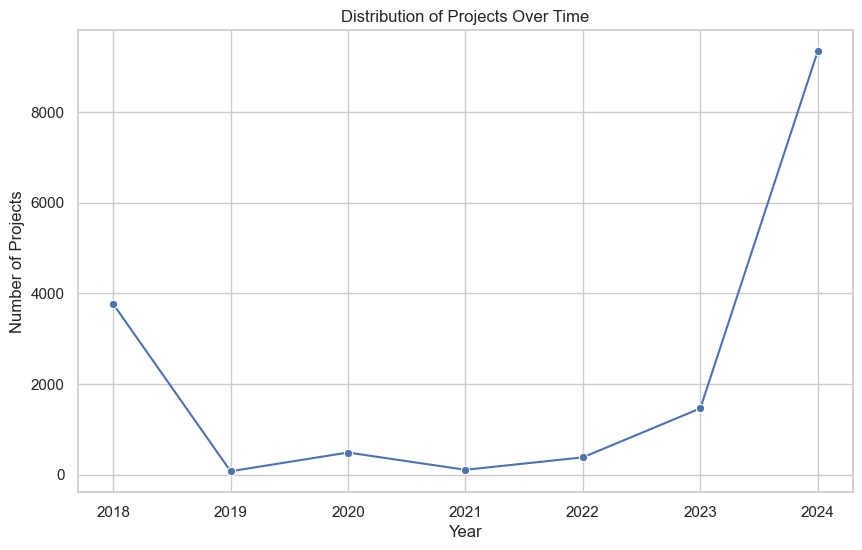

In [43]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Prepare data for the visualization
nasa_data_cleaned['Year'] = nasa_data_cleaned['Project Last Updated'].dt.year
projects_per_year = nasa_data_cleaned['Year'].value_counts().sort_index()

# Plot for Distribution of Projects Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=projects_per_year.index, y=projects_per_year.values, marker='o')
plt.title('Distribution of Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()


Distribution of Projects Over Time:
- This line chart shows the number of projects initiated by NASA each year. It provides an overview of how active NASA has been in starting new technology projects over the years.


C:\Users\16469\AppData\Local\Temp\ipykernel_21624\1788485747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_programs.values, y=top_programs.index, palette='viridis')


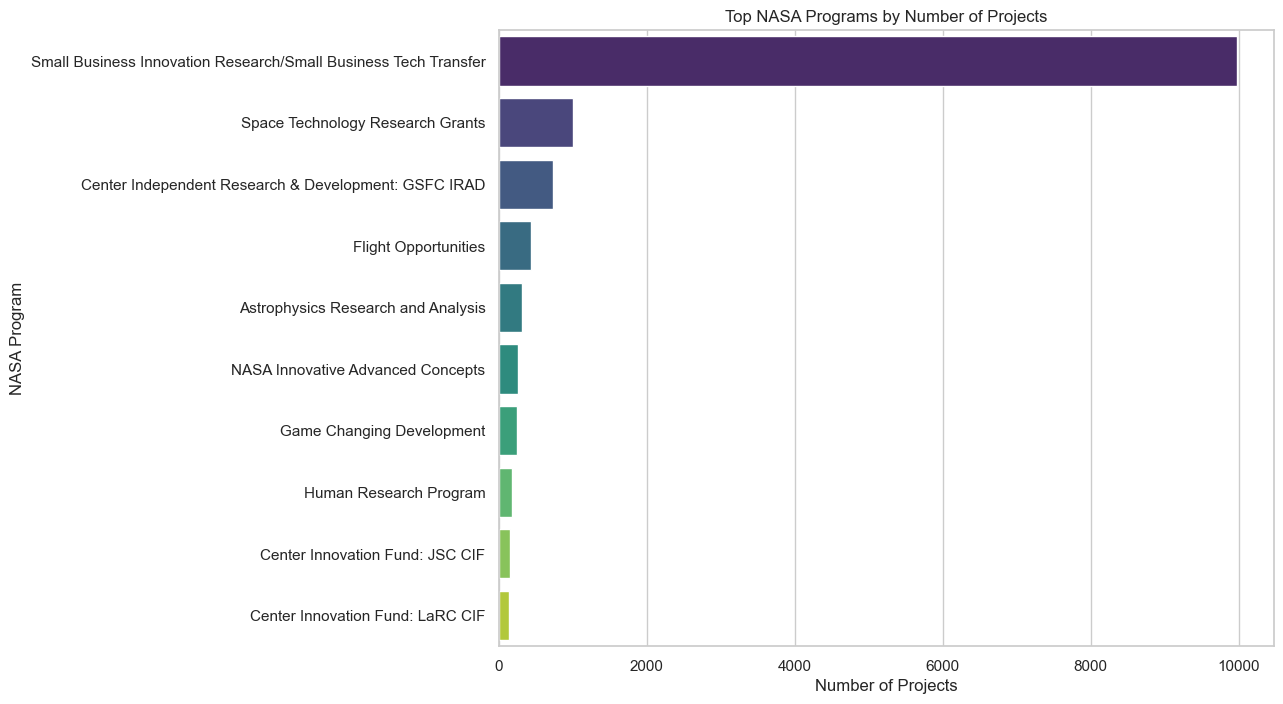

In [44]:
# Prepare data for the visualization
top_programs = nasa_data_cleaned['Responsible NASA Program'].value_counts().head(10)

# Plot for Top NASA Programs
plt.figure(figsize=(10, 8))
sns.barplot(x=top_programs.values, y=top_programs.index, palette='viridis')
plt.title('Top NASA Programs by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('NASA Program')
plt.show()


Top NASA Programs:
- The bar chart displays the top NASA programs by the number of projects. This helps us understand which programs are most actively involved in developing new technologies.


C:\Users\16469\AppData\Local\Temp\ipykernel_21624\463334519.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_taxonomies.values, y=top_taxonomies.index, palette='cubehelix')


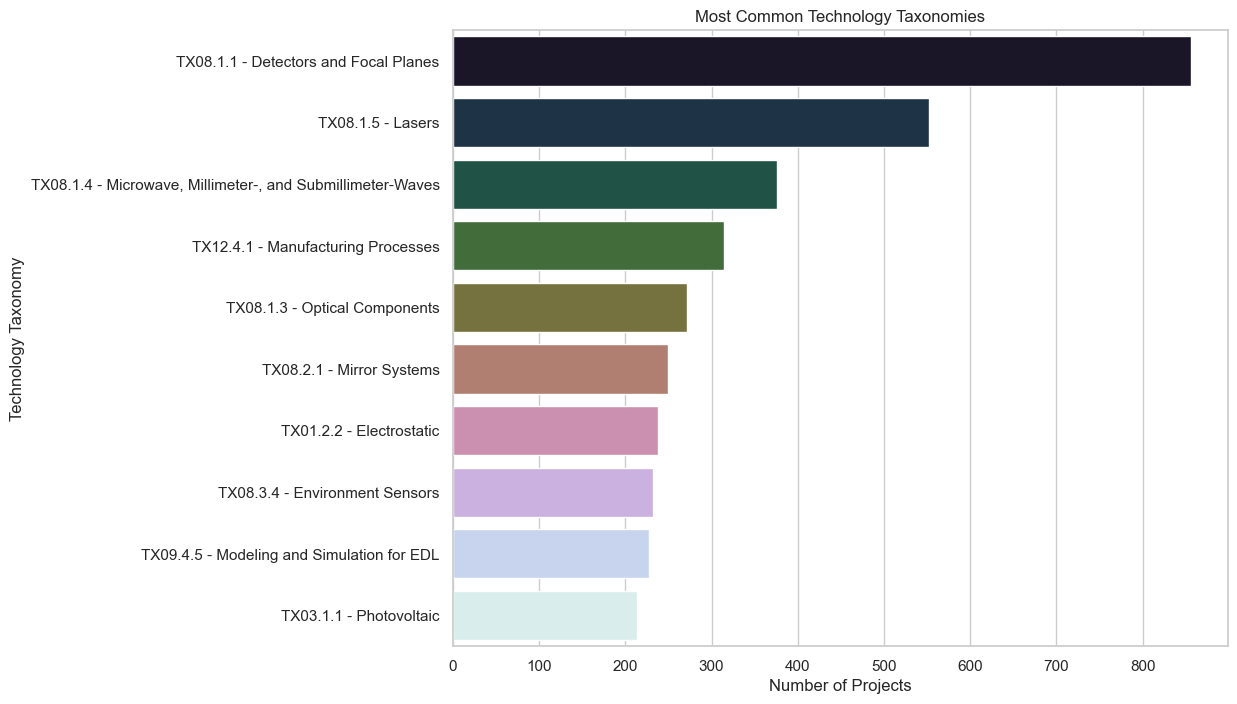

In [45]:
# Prepare data for the visualization
top_taxonomies = nasa_data_cleaned['Primary Taxonomy'].value_counts().head(10)

# Plot for Common Technology Taxonomies
plt.figure(figsize=(10, 8))
sns.barplot(x=top_taxonomies.values, y=top_taxonomies.index, palette='cubehelix')
plt.title('Most Common Technology Taxonomies')
plt.xlabel('Number of Projects')
plt.ylabel('Technology Taxonomy')
plt.show()


Most Common Technology Taxonomies:
- This bar chart highlights the most frequent technology categories. It gives an idea of the key areas of focus in NASA's technology projects.


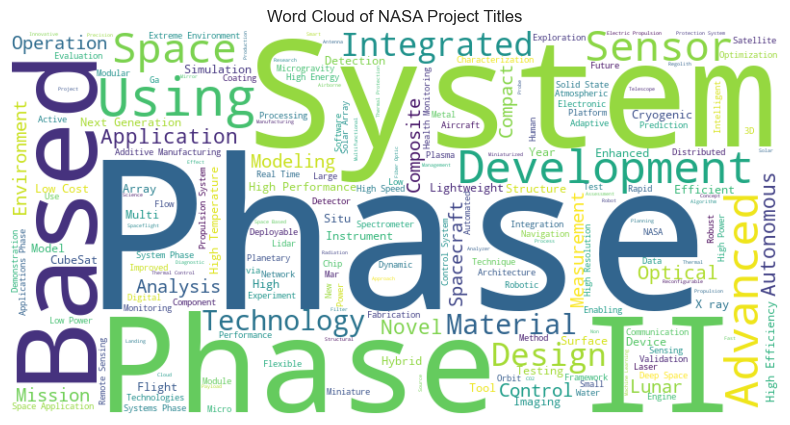

In [46]:
from wordcloud import WordCloud

# Prepare data for Word Cloud
text = " ".join(title for title in nasa_data_cleaned['Project Title'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of NASA Project Titles')
plt.show()


Word Cloud of NASA Project Titles:
- The word cloud visualizes common words found in the project titles, giving a quick glimpse of popular themes and focus areas in NASA projects.



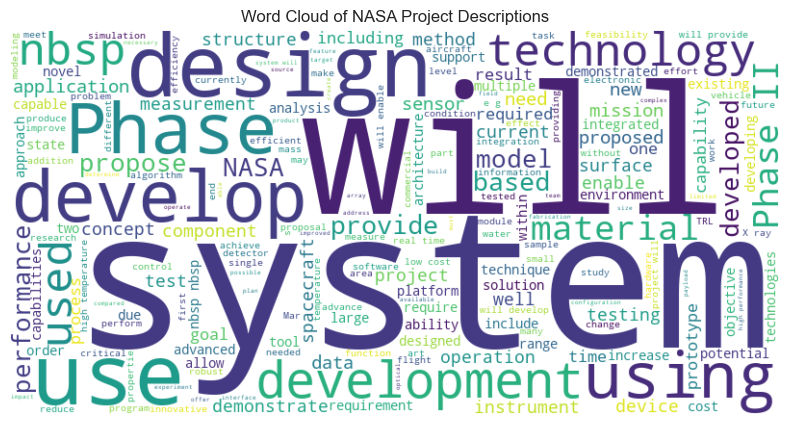

In [47]:
# Prepare data for Word Cloud
description_text = " ".join(desc for desc in nasa_data_cleaned['Project Description'])
description_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(description_text)

# Display Word Cloud for Project Descriptions
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of NASA Project Descriptions')
plt.show()


Word Cloud of NASA Project Descriptions:
- The word cloud visualizes common words found in the project descriptions, giving a quick glimpse of popular words and focus areas in NASA projectsuch as system, phase, design, development and many more

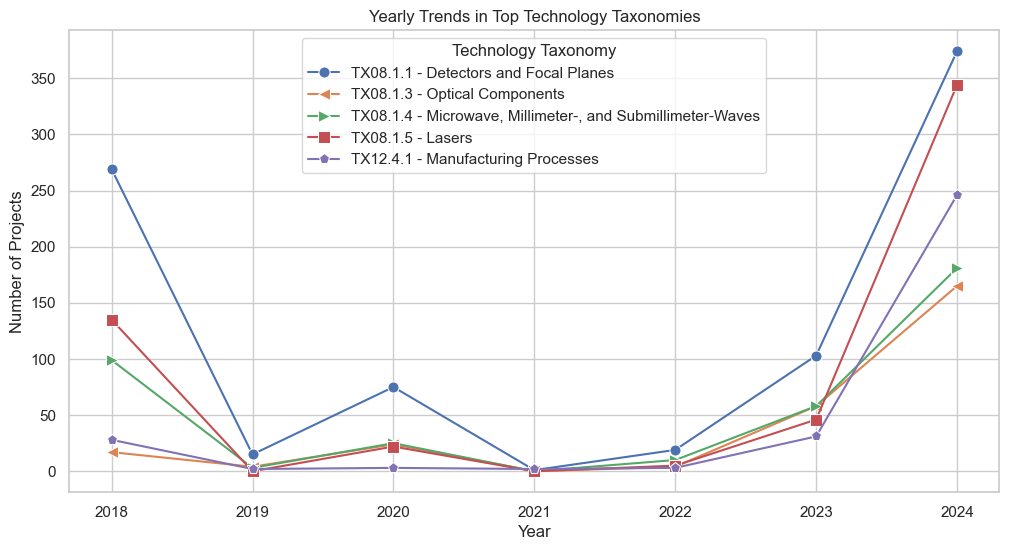

In [48]:
# Prepare data for Trends in Top Technology Categories Over Recent Years
top_categories = nasa_data_cleaned['Primary Taxonomy'].value_counts().nlargest(5).index
trends_data = nasa_data_cleaned[nasa_data_cleaned['Primary Taxonomy'].isin(top_categories)]
trends_over_time = trends_data.pivot_table(index='Year', columns='Primary Taxonomy', aggfunc='size', fill_value=0)

# Plot trends for Top Technology Categories over recent years
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends_over_time, dashes=False, markers=['o','<','>','s','p'], markersize=8)
plt.title('Yearly Trends in Top Technology Taxonomies')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend(title='Technology Taxonomy')
plt.grid(True)
plt.show()


Yearly Trends in Top Technology Texonomies:
- The line graph shows popular Technology Taxonomy across number of proects over different years from 2018 to 2024.

These visualizations should provide a solid foundation for further analysis, such as identifying patterns or trends in the data, and for preparing the data for machine learning modeling.

### Conclusions from EDA:

The EDA has effectively mapped the landscape of NASA's technology projects, identifying key areas of focus and growth. The increase in project counts in recent years, particularly in cutting-edge technological fields, reflects NASA's proactive approach to fostering innovation. The insights gained through this analysis will serve as a foundation for subsequent predictive modeling and classification tasks, aimed at further dissecting and forecasting the trends in NASA's technological pursuits.

## Data Preparation and Preprocessing
### Text Preprocessing

Before diving into text analysis, it's crucial to preprocess the text data to enhance the quality of insights derived from it. This preprocessing includes:

1. **Removing Non-Alphabetic Characters**: This step cleans up the text by removing any characters that are not letters, which simplifies the analysis and avoids potential noise in the data.
2. **Converting to Lowercase**: Standardizing the case of all words ensures that the same words are recognized as the same, regardless of how they are presented in the original text.
3. **Optional Removal of Stopwords**: Although not utilized in this step, removing common stopwords can be helpful in focusing the analysis on more meaningful words. This option is included in the function but not activated in the initial cleaning to preserve the full context of the text.

The cleaned text will be used for further analysis such as feature extraction and modeling.


In [49]:

# Ensure that nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16469\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16469\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:

stop_words = set(stopwords.words('english'))

def clean_text(text, remove_stopwords=True, keep_numbers=False):
    """Clean text by removing special characters, optionally keeping numbers, and optionally removing stopwords."""
    if keep_numbers:
        # Remove all non-alphanumeric characters except spaces (keeping numbers)
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I|re.A)
    else:
        # Remove all non-alphabetic characters (excluding numbers)
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # Convert text to lowercase
    text = text.lower()

    # Optionally remove stopwords
    if remove_stopwords:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning to the descriptions
nasa_data_cleaned['Cleaned Description'] = nasa_data_cleaned['Project Description'].apply(lambda x: clean_text(x, remove_stopwords=True, keep_numbers=False))

# Tokenization - create a new column for tokens
nasa_data_cleaned['Tokens'] = nasa_data_cleaned['Cleaned Description'].apply(word_tokenize)

# Display the original descriptions with their tokens
nasa_data_cleaned[['Project Description', 'Tokens']].head()


,Project Description,Tokens
0,"We propose to integrate next-generation lidar,...","[propose, integrate, nextgeneration, lidar, co..."
1,The Radiation Tolerant Displays project aims t...,"[radiation, tolerant, displays, project, aims,..."
2,"Currently under development at NASA, the Conti...","[currently, development, nasa, continuous, bos..."
3,NASA is seeking to challenge the GrabCAD Commu...,"[nasa, seeking, challenge, grabcad, community,..."
4,NASA's CO2 Conversion Challenge is a $1 millio...,"[nasas, co, conversion, challenge, million, co..."


### Text Cleaning Results

The output above shows the first few entries of cleaned project descriptions. This preprocessing step is vital for ensuring that our text analysis is focused on relevant content, improving both the performance and accuracy of subsequent text-based analyses and machine learning models.

The function used allows for flexibility in terms of removing stopwords, which can be toggled based on the specific requirements of further analysis or feature engineering steps.


### Feature Engineering and Transformation

To prepare the dataset for machine learning models, we need to engineer and transform the features appropriately:

1. **TF-IDF Transformation**: We convert the cleaned text descriptions into a numerical format using TF-IDF (Term Frequency-Inverse Document Frequency). This method reflects the importance of words in the context of the dataset.
2. **Feature Addition - Description Length and Sentiment**:
   - **Length**: We calculate the length of each project description as it might correlate with the depth of project details.
   - **Sentiment**: We extract the sentiment polarity of each description to capture the emotional tone, which might reflect the nature of the project.
3. **Normalization**: We normalize these new features to ensure they contribute equally to the analysis without bias due to scale differences.

These steps not only transform textual data into a machine-readable format but also enrich the dataset with potentially insightful features for subsequent modeling.


In [51]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Fit and transform the cleaned project descriptions
tfidf_features = tfidf_vectorizer.fit_transform(nasa_data_cleaned['Cleaned Description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Feature Engineering: Adding length and sentiment of project description
nasa_data_cleaned['Description_Length'] = nasa_data_cleaned['Project Description'].apply(len)
nasa_data_cleaned['Description_Sentiment'] = nasa_data_cleaned['Project Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Normalizing the newly added features
scaler = StandardScaler()
nasa_data_cleaned[['Description_Length', 'Description_Sentiment']] = scaler.fit_transform(nasa_data_cleaned[['Description_Length', 'Description_Sentiment']])

# Create a new DataFrame with the desired columns
desired_features_df = nasa_data_cleaned[['Project Description', 'Description_Length', 'Description_Sentiment']]

# Display the first few rows of the updated dataframe with new features
desired_features_df.head()

,Project Description,Description_Length,Description_Sentiment
0,"We propose to integrate next-generation lidar,...",-0.614339,-0.648588
1,The Radiation Tolerant Displays project aims t...,-1.203954,-1.135559
2,"Currently under development at NASA, the Conti...",-0.510159,1.653759
3,NASA is seeking to challenge the GrabCAD Commu...,0.028473,0.809171
4,NASA's CO2 Conversion Challenge is a $1 millio...,-1.280426,-1.705852


### Output and Insights from Feature Engineering

The dataframe displayed above incorporates the new features: normalized description length and sentiment. Here are a few insights:

- **Description Length**: Normalization allows us to compare the relative verbosity or conciseness of project descriptions regardless of their absolute length.
- **Sentiment Analysis**: Sentiment scores help us understand the general tone (positive, neutral, or negative) of the project descriptions, which could potentially correlate with the project's nature or objectives.

These features will be integral to our machine learning models, providing additional dimensions for analysis and prediction.


In [52]:
# Display the first 10 feature names from the TF-IDF vectorization
print("First 10 TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out()[:10])

First 10 TF-IDF Feature Names: ['ability' 'able' 'absorption' 'access' 'accuracy' 'accurate' 'accurately'
 'achieve' 'achieved' 'achieving']


### Examining TF-IDF Features

After transforming the cleaned project descriptions into a TF-IDF matrix, it's insightful to look at the feature names extracted by the vectorizer. These feature names represent the terms that are weighted as most significant across the project descriptions, considering both their frequency in individual documents and their inverse frequency across all documents.

**First 10 TF-IDF Feature Names**:
Displayed below are the first ten feature names from the TF-IDF transformation, providing a glimpse into the key terms that the model considers important.

- **Feature List**: ['ability', 'able', 'about', 'above', 'absorption', 'access', 'accuracy', 'accurate', 'achieve', 'achieved']

These terms reflect the thematic and functional aspects frequently mentioned in NASA's project descriptions and could be crucial indicators of the content's focus areas.


### Finalizing Feature Set for Modeling

To prepare our dataset for machine learning models, we perform several key steps to ensure our data is appropriately formatted and complete:

1. **Encoding Categorical Variables**: We use one-hot encoding to transform the categorical variables 'Responsible NASA Program' and 'Primary Taxonomy' into a machine-readable format. This encoding creates new columns, each representing a category of the original features.

2. **Simplifying the Dataset**: Before concatenating the features, we remove the original text columns 'Project Description' and 'Cleaned Description' as they are no longer necessary for modeling. This step helps in reducing the dataset's complexity and focusing on the engineered features.

3. **Concatenation**: We concatenate the TF-IDF features with the newly encoded categorical data. This step involves ensuring that both dataframes share the same index and then combining them horizontally to create a comprehensive feature set.

4. **Checking for Missing Values**: After concatenation, we check for any missing values in the final dataset to ensure that there are no gaps that might affect the performance of our models.




In [53]:
# Encoding categorical variables: 'Responsible NASA Program' and 'Primary Taxonomy'
encoded_data = pd.get_dummies(nasa_data_cleaned, columns=['Responsible NASA Program', 'Primary Taxonomy'], drop_first=True)

# Drop unnecessary columns before concatenation to simplify the process
cleaned_encoded_data = encoded_data.drop(['Project Description', 'Cleaned Description'], axis=1)

# Ensure TF-IDF features and new features have the same index and concatenate
final_features_df = pd.concat([tfidf_df.reset_index(drop=True), cleaned_encoded_data.reset_index(drop=True)], axis=1)

# Check for any missing values and summarize
missing_values = final_features_df.isnull().sum()
missing_summary = missing_values[missing_values > 0]

# Display the missing values summary
if not missing_summary.empty:
    print("Missing Values Summary:", missing_summary)
else:
    print("No missing values found.")

# Display the first few rows of the final features dataframe
final_features_df.head()




No missing values found.


,ability,able,absorption,access,accuracy,accurate,accurately,achieve,achieved,achieving,...,Primary Taxonomy_TX17.5.2 - GN&C Fault Management / Fault Tolerance / Autonomy,Primary Taxonomy_TX17.5.4 - GN&C Ground Testbeds/Test Facilities\t,Primary Taxonomy_TX17.5.5 - Vehicle Flight Dynamics and Mission Design Tools/Techniques\t,Primary Taxonomy_TX17.5.6 - System Identification\t,Primary Taxonomy_TX17.5.7 - End-to-End Modeling and Simulation of GN&C Systems,Primary Taxonomy_TX17.5.8 - Flying/Handling Qualities,"Primary Taxonomy_TX17.5.9 - Onboard and Ground-BasedTerrain and Object Simulation, Mapping, and Modeling Software",Primary Taxonomy_TX17.6.1 - Strategic Management of Air Vehicles,Primary Taxonomy_TX17.6.2 - Tactical Management of Air Vehicles\t,"Primary Taxonomy_TX17.X - Other Guidance, Navigation, and Control"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


**Summary of Features**: The final dataset contains 1507 features, a combination of TF-IDF derived terms and one-hot encoded categorical variables, providing a rich feature set for subsequent analysis.

The resulting dataframe is displayed below, showing no missing values and providing a snapshot of the first few rows. This comprehensive feature set is ready for use in predictive modeling and analysis.

### Final Data Preparation

In this initial phase, we prepare our dataset for the machine learning process:

1. **Resetting Indices**: To ensure data synchronization, we reset the indices of our cleaned data frames.
2. **Encoding Target Variable**: The 'Primary Taxonomy' is encoded to facilitate machine learning analysis.
3. **Data Filtering**: We filter the dataset to focus on the top 10 most frequent taxonomies, helping to balance and refine our model's focus.
4. **Feature Preparation**: Numeric features are selected and then processed through imputation and scaling to ensure they are ready for training. This includes filling missing values and normalizing the data range.


In [54]:

# Reset indices and re-encode target variable
nasa_data_cleaned = nasa_data_cleaned.reset_index(drop=True)
final_features_df = final_features_df.reset_index(drop=True)
label_encoder = LabelEncoder()
nasa_data_cleaned['Encoded Primary Taxonomy'] = label_encoder.fit_transform(nasa_data_cleaned['Primary Taxonomy'])

# Filtering and feature preparation
top_categories = nasa_data_cleaned['Primary Taxonomy'].value_counts().nlargest(10).index
filtered_data = nasa_data_cleaned[nasa_data_cleaned['Primary Taxonomy'].isin(top_categories)]
filtered_features = final_features_df.loc[filtered_data.index]
numeric_features = filtered_features.select_dtypes(include=[np.number])

# Imputation and scaling
imputer = SimpleImputer(strategy='constant', fill_value=0)
numeric_features_imputed = imputer.fit_transform(numeric_features)
scaler = MinMaxScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features_imputed)


# Prepped Data Review

#### Tokenization and Word Frequency Analysis

This section involves tokenizing the project descriptions and calculating the frequency of each word. This helps identify the most commonly used terms in the project descriptions, which can provide insight into prevalent themes and focus areas within the NASA technology projects dataset.

In [55]:

# Tokenization - create a new column for tokens
nasa_data_cleaned['Tokens'] = nasa_data_cleaned['Cleaned Description'].apply(word_tokenize)

# Flatten list of words in all documents
all_words = [word for sublist in nasa_data_cleaned['Tokens'].tolist() for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Display the 20 most common words
common_words = word_counts.most_common(20)
common_words

[('system', 16562),
 ('phase', 13127),
 ('space', 11004),
 ('high', 10749),
 ('technology', 10707),
 ('design', 10681),
 ('systems', 9227),
 ('nasa', 9000),
 ('develop', 8329),
 ('data', 8126),
 ('power', 8034),
 ('proposed', 7911),
 ('performance', 7438),
 ('development', 7118),
 ('using', 7039),
 ('missions', 6538),
 ('use', 6516),
 ('new', 6018),
 ('provide', 5905),
 ('used', 5744)]

#### Visualization of Top Word Frequencies

Following the word frequency analysis, this visualization displays the top 20 most common words in the cleaned project descriptions. It highlights the key terms and concepts that are frequently mentioned across the dataset.

C:\Users\16469\AppData\Local\Temp\ipykernel_21624\276177564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


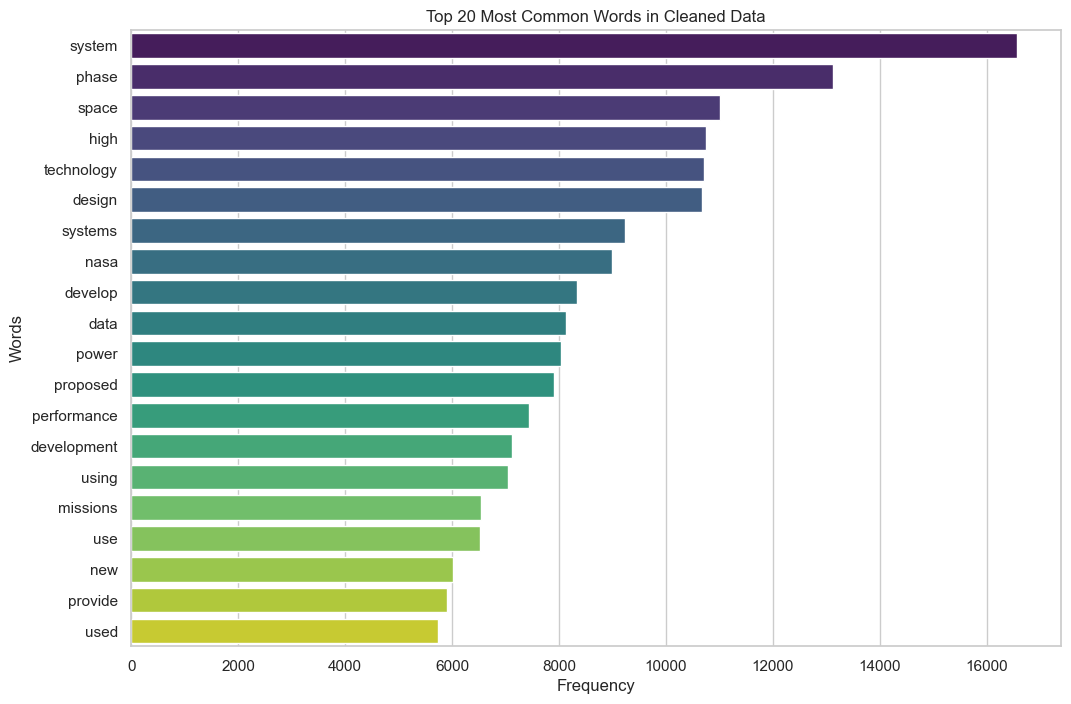

In [56]:

# Extracting words and their counts for plotting
words, counts = zip(*common_words)

# Plotting the word frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Cleaned Data')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

#### Topic Modeling with LDA

This chunk sets up and fits a Latent Dirichlet Allocation (LDA) model to the text data, helping to uncover latent topics within the NASA project descriptions. It then displays the top words for each topic, aiding in the interpretation of what each topic may represent.

In [57]:
# Data Preparation: Using CountVectorizer to convert text data to a matrix of token counts
count_vectorizer = CountVectorizer(max_features=1000)
count_data = count_vectorizer.fit_transform(nasa_data_cleaned['Cleaned Description'])

# Number of topics to extract
n_topics = 10

# Initialize LDA model with 10 topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Fit LDA model to the count data
lda_model = lda.fit(count_data)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics[topic_idx] = ", ".join(top_features)
    return topics

# Number of top words to display for each topic
no_top_words = 10

# Get feature names from the CountVectorizer
tfidf_feature_names = count_vectorizer.get_feature_names_out()

# Display the top words in each topic
topics = display_topics(lda_model, tfidf_feature_names, no_top_words)

topics



{0: 'models, model, surface, research, flow, data, used, radiation, study, modeling',
 1: 'materials, high, material, properties, temperature, composite, thermal, structures, energy, performance',
 2: 'sensor, laser, system, phase, sensors, measurements, optical, measurement, lidar, high',
 3: 'power, system, high, heat, propulsion, systems, thermal, design, low, control',
 4: 'data, system, software, systems, control, flight, develop, aircraft, nasa, operations',
 5: 'lunar, water, system, surface, process, regolith, mars, manufacturing, oxygen, space',
 6: 'mission, space, spacecraft, science, missions, small, technology, xray, solar, flight',
 7: 'design, system, space, test, testing, systems, flight, technology, phase, development',
 8: 'high, imaging, noise, optical, detector, design, resolution, nbsp, technology, detectors',
 9: 'phase, ii, technology, design, solar, nasa, high, cell, performance, system'}

#### Visualizing Topic Distribution for the First Document

This plot shows the distribution of topics within the first document. It helps identify the dominant themes present in this particular document, which can be useful for understanding how different topics are emphasized in individual project descriptions.

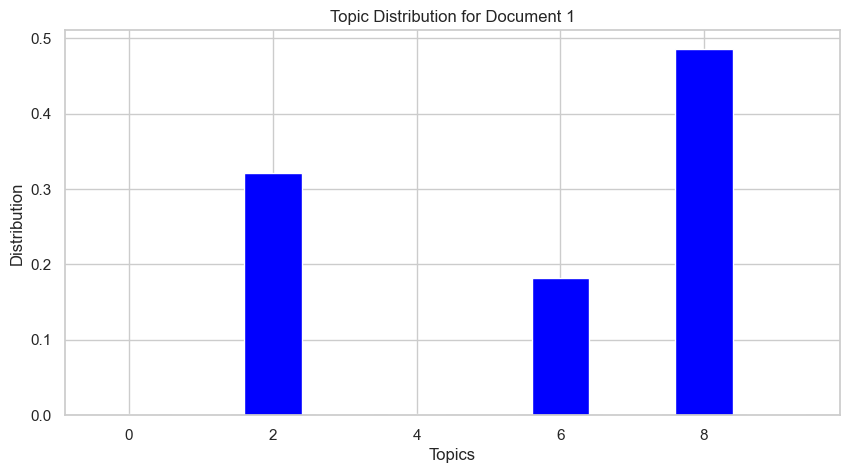

In [58]:
# Create a document-topic matrix
doc_topic = lda_model.transform(count_data)

# Plotting the topic distribution for the first document
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(doc_topic.shape[1]), doc_topic[0], color='blue')  # Change '0' to other indices to view different documents
plt.xlabel('Topics')
plt.ylabel('Distribution')
plt.title('Topic Distribution for Document 1')
plt.show()


#### Visualizing Topic Distributions Across Multiple Documents

This section visualizes the topic distributions across the first ten documents. This multi-document view allows for the comparison of topic emphasis across different project descriptions, offering insights into common and unique themes.

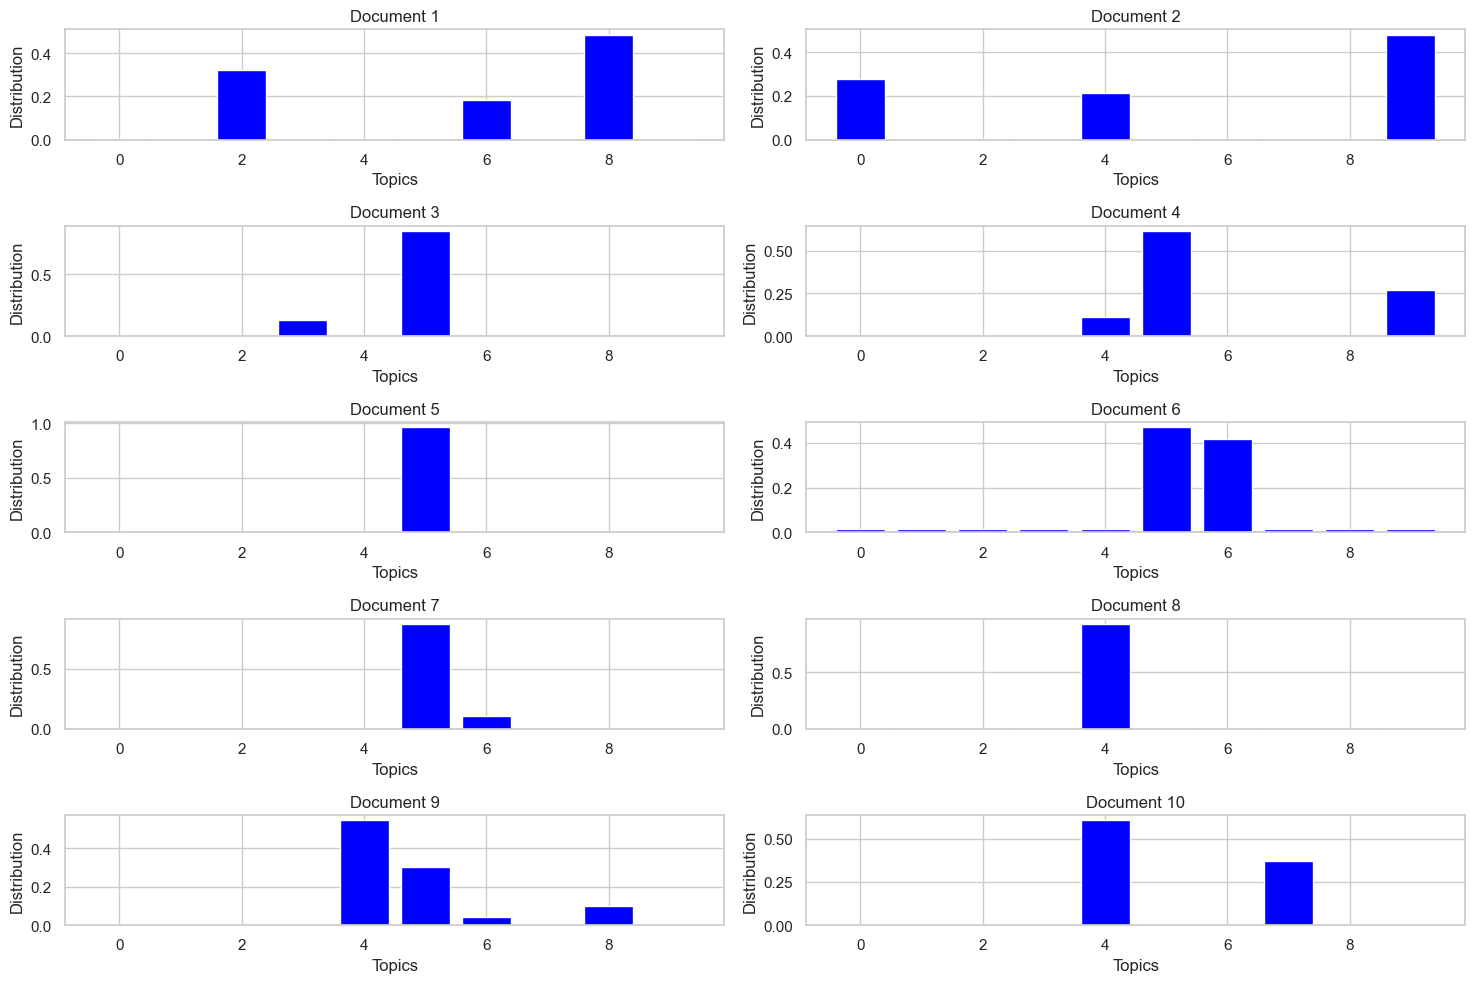

In [59]:
# Plotting the topic distribution for the first 10 documents
plt.figure(figsize=(15, 10))
for i in range(10):  # Adjust the range to plot more or fewer documents
    plt.subplot(5, 2, i + 1)  # Arranging plots in 5 rows and 2 columns
    plt.bar(range(doc_topic.shape[1]), doc_topic[i], color='blue')
    plt.title(f'Document {i+1}')
    plt.xlabel('Topics')
    plt.ylabel('Distribution')
plt.tight_layout()
plt.show()


#### Visualizing Top Words in Each Topic

This code segment plots the weight of the top words in each topic identified by the LDA model. These visualizations are crucial for understanding the composition of each topic, which helps in interpreting the themes more effectively.

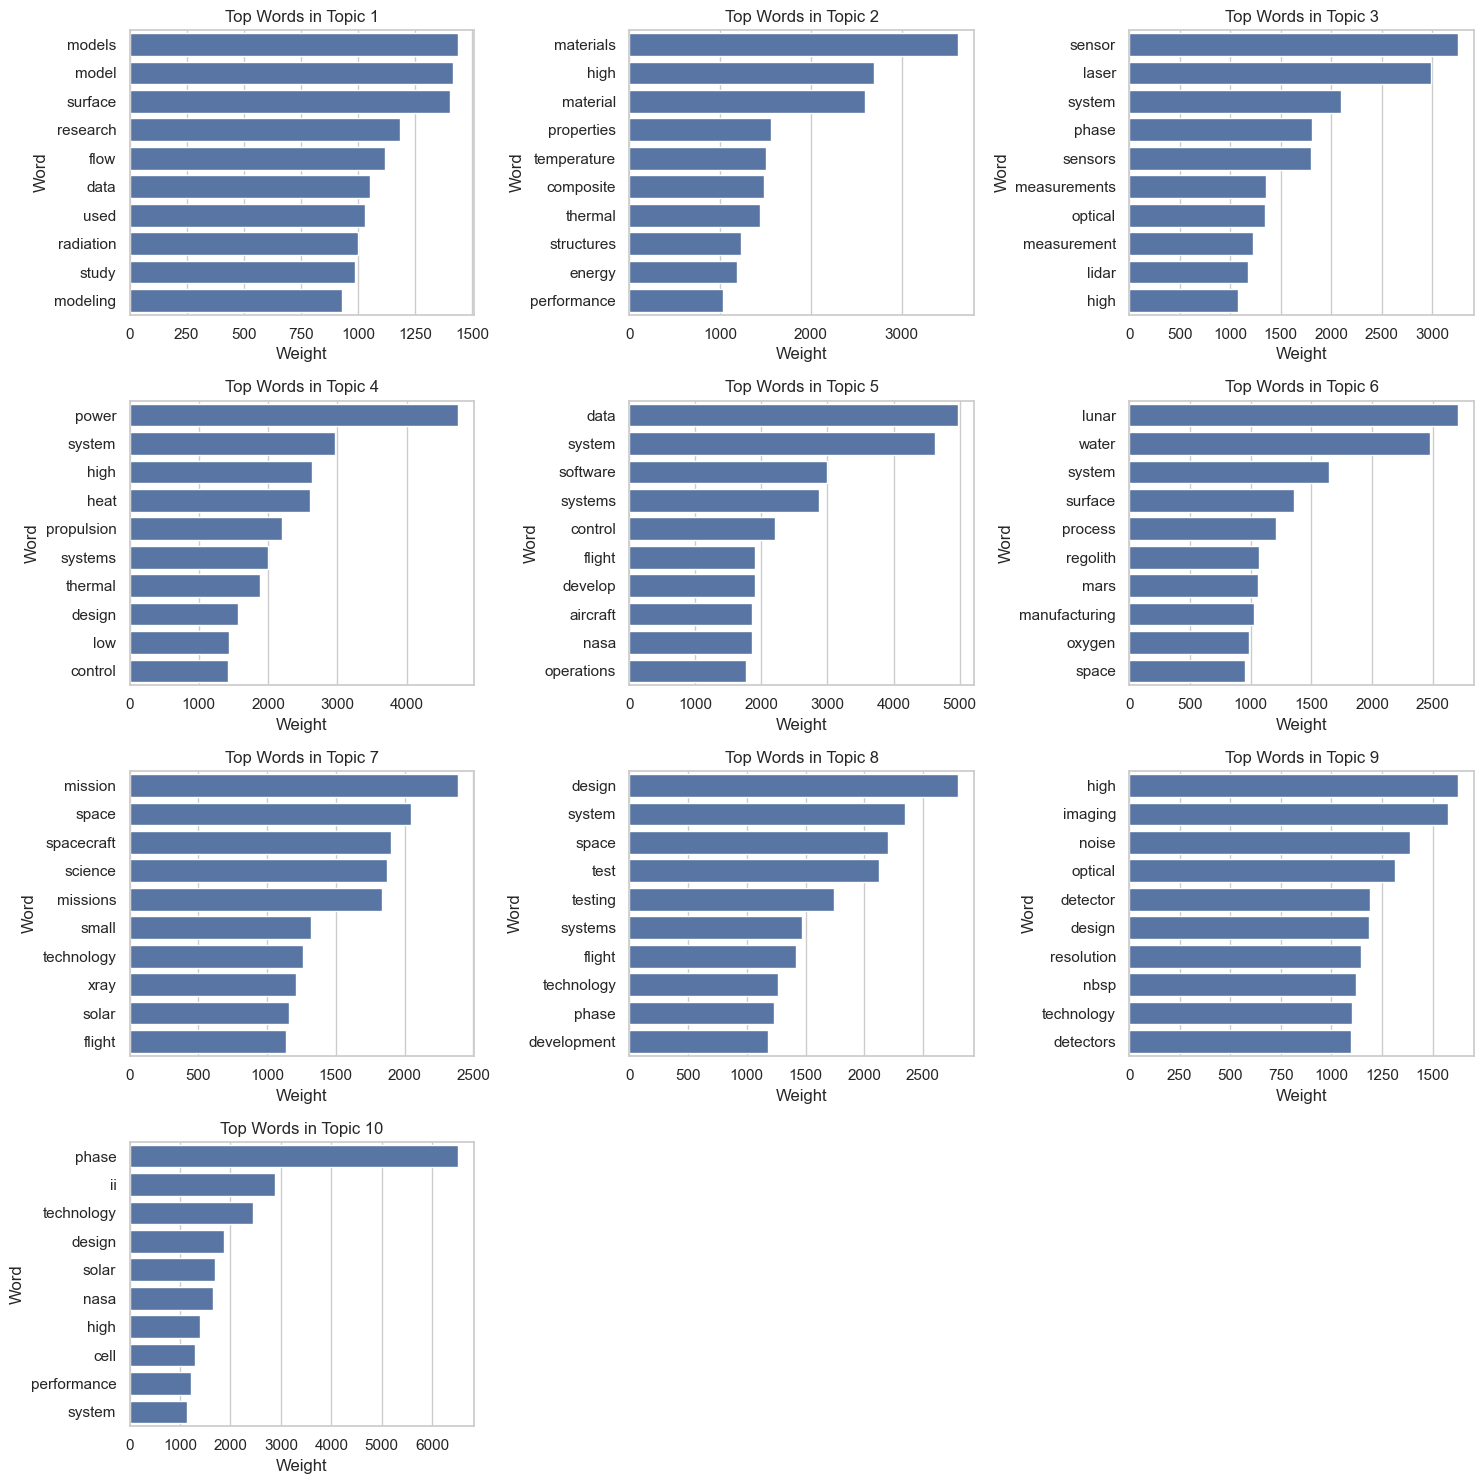

In [60]:
# Function to plot the word weights in each topic
def plot_topic_word_weights(model, vectorizer, topic_idx, n_topics, top_n=10):
    # Get the word weights for the specified topic
    word_weights = model.components_[topic_idx]
    words = vectorizer.get_feature_names_out()
    word_importance = [(words[i], word_weights[i]) for i in word_weights.argsort()[:-top_n - 1:-1]]
    
    # Convert to DataFrame
    df = pd.DataFrame(word_importance, columns=['word', 'weight'])
    
    # Define the number of columns in the grid
    n_cols = 3
    # Compute the number of rows needed to display all plots
    n_rows = (n_topics + n_cols - 1) // n_cols
    
    # Create subplot for current topic
    plt.subplot(n_rows, n_cols, topic_idx + 1)
    sns.barplot(x='weight', y='word', data=df)
    plt.title(f'Top Words in Topic {topic_idx + 1}')
    plt.xlabel('Weight')
    plt.ylabel('Word')

# Set up the figure size
plt.figure(figsize=(15, n_topics // 3 * 5))

# Loop over the number of topics and plot the word weights for each topic
for topic_idx in range(n_topics):
    plot_topic_word_weights(lda_model, count_vectorizer, topic_idx, n_topics=n_topics)

# Show the entire grid of plots
plt.tight_layout()
plt.show()


#### Mean Topic Proportions Across All Documents

This plot provides an overview of the average distribution of topics across all documents. It highlights the most prevalent themes within the entire corpus, indicating common areas of focus or interest in the dataset.

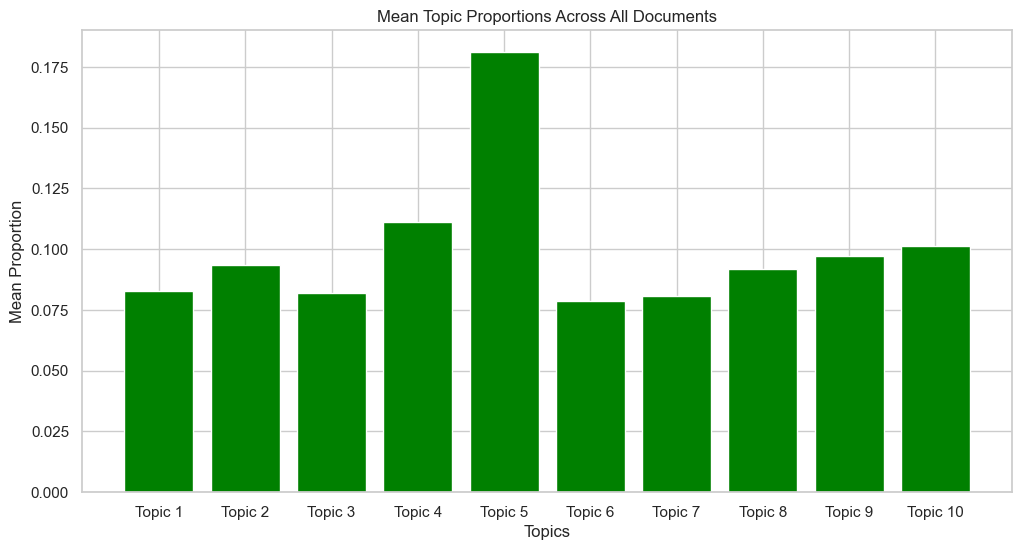

In [61]:
# Calculate the mean topic proportions across all documents
mean_topic_proportions = np.mean(doc_topic, axis=0)

# Plotting the mean topic proportions
plt.figure(figsize=(12, 6))
plt.bar(range(len(mean_topic_proportions)), mean_topic_proportions, color='green')
plt.xlabel('Topics')
plt.ylabel('Mean Proportion')
plt.title('Mean Topic Proportions Across All Documents')
plt.xticks(range(len(mean_topic_proportions)), [f'Topic {i+1}' for i in range(len(mean_topic_proportions))])
plt.show()


### Conclusion of Prepped Data Review

The preparatory data analysis of NASA's technology projects dataset has provided deep insights into the thematic structure and word usage within the project descriptions. Key findings from this phase include:

1.  Word Frequency Analysis: The most common words, as illustrated in the frequency bar charts, include 'system,' 'technology,' 'data,' and 'NASA,' which highlight a strong emphasis on technological and systemic development within the projects. This suggests a focused narrative on enhancing and developing robust systems and technologies.

2.  Topic Distribution Analysis: The topic modeling via Latent Dirichlet Allocation (LDA) has revealed distinct themes within the projects, with topics ranging from sensor technology and data management to propulsion systems and materials science. Each document shows varying degrees of association with these topics, indicating diverse focuses across different projects.

3.  Top Words in Topics: The analysis of the top words within each topic provided further granularity, identifying specific areas such as 'sensor,' 'laser,' 'power,' and 'mission' as focal points within the projects. This underscores NASA's strategic priorities in developing high-precision instruments and advancing space mission capabilities.

4.  Mean Topic Proportions: The mean topic proportions across all documents highlight that certain themes have a more dominant presence in the dataset, suggesting areas of heavier investment and interest by NASA. For example, topics related to data systems and propulsion technologies appear prominently, reflecting ongoing efforts in improving space travel technology and data analytics capabilities.

These findings not only enhance our understanding of NASA's current technological endeavors but also help in predicting future trends and areas of development. The insights gained are pivotal for supporting strategic planning and decision-making processes at NASA, offering a clearer picture of the agency's focus areas in technology and innovation.

## Machine Learning Models
### Model Training, Testing and Evaluation

Once our features are prepared, we proceed to the crucial steps of training and testing:

1. **Data Splitting**: The dataset is split into training and testing subsets, ensuring a 20% holdout for testing to validate the model performance accurately.
2. **Model Training**: A Multinomial Naive Bayes classifier is trained on the processed features. This model is suitable for classification tasks with discrete feature sets like ours.
3. **Prediction**: Using the trained model, we predict the taxonomies of the test set.
4. **Classification Report**: A detailed report including precision, recall, and F1-score for each category is generated, providing insights into the model's effectiveness.

In [62]:

# Split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(
    numeric_features_scaled, filtered_data['Encoded Primary Taxonomy'], test_size=0.2, random_state=42, stratify=filtered_data['Encoded Primary Taxonomy']
)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict and evaluate the model's performance
y_pred = naive_bayes_classifier.predict(X_test)
classification_report_output = classification_report(
    y_test, y_pred, target_names=label_encoder.inverse_transform(np.unique(y_train)), zero_division=0
)
print(classification_report_output)



                                                            precision    recall  f1-score   support

                                  TX01.2.2 - Electrostatic       0.88      0.94      0.91        48
                                   TX03.1.1 - Photovoltaic       0.92      0.84      0.88        43
                     TX08.1.1 - Detectors and Focal Planes       0.70      0.78      0.74       171
                             TX08.1.3 - Optical Components       0.36      0.07      0.12        55
TX08.1.4 - Microwave, Millimeter-, and Submillimeter-Waves       0.72      0.68      0.70        75
                                         TX08.1.5 - Lasers       0.74      0.87      0.80       111
                                 TX08.2.1 - Mirror Systems       0.65      0.72      0.69        50
                            TX08.3.4 - Environment Sensors       0.53      0.52      0.53        46
                TX09.4.5 - Modeling and Simulation for EDL       0.84      0.82      0.83        45

### Evaluation Results

The classification report provided above details the model's precision, recall, and F1-score across different categories. These metrics help in assessing the effectiveness of the Naive Bayes classifier and identify areas where the model performs well or may need improvement. The balanced accuracy and weighted metrics give a comprehensive overview of the model's overall performance.

### Training and Evaluating the SVM Classifier

To explore alternative models and potentially improve our classification results, we employ a Support Vector Machine (SVM) with a linear kernel:

1. **Model Initialization**: The SVM classifier is initialized with a linear kernel to handle our multi-class classification problem effectively.
2. **Model Training**: Using the same preprocessed and scaled feature set prepared for the Naive Bayes model, we train the SVM classifier. This approach allows for a direct comparison of performance across different model types.
3. **Prediction**: After training, we use the SVM model to predict the test set outcomes, aiming to assess its generalization ability on unseen data.
4. **Evaluation**: The performance of the SVM classifier is quantitatively assessed using a classification report, which provides detailed metrics such as precision, recall, and F1-score for each taxonomy category.



In [63]:

# Initialize the Support Vector Machine classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the numeric and scaled dataset
svm_classifier.fit(X_train, y_train)

# Predict on the test set using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model using the classification report
classification_report_svm = classification_report(
    y_test, y_pred_svm, target_names=label_encoder.inverse_transform(np.unique(y_train)), zero_division=0
)

# Print the classification report for the SVM model
print(classification_report_svm)


                                                            precision    recall  f1-score   support

                                  TX01.2.2 - Electrostatic       0.96      0.94      0.95        48
                                   TX03.1.1 - Photovoltaic       0.88      0.84      0.86        43
                     TX08.1.1 - Detectors and Focal Planes       0.65      0.77      0.70       171
                             TX08.1.3 - Optical Components       0.37      0.27      0.31        55
TX08.1.4 - Microwave, Millimeter-, and Submillimeter-Waves       0.62      0.60      0.61        75
                                         TX08.1.5 - Lasers       0.81      0.80      0.81       111
                                 TX08.2.1 - Mirror Systems       0.75      0.66      0.70        50
                            TX08.3.4 - Environment Sensors       0.58      0.54      0.56        46
                TX09.4.5 - Modeling and Simulation for EDL       0.88      0.80      0.84        45

### SVM Model Evaluation Results

The classification report for the SVM model is provided above, detailing the performance metrics for each category within our dataset:

- **Precision, Recall, and F1-Score**: These metrics are crucial for understanding the effectiveness of the SVM classifier across different taxonomies. While some categories like 'TX01.2.2 - Electrostatic' show high scores across all metrics, others like 'TX08.1.3 - Optical Components' demonstrate room for improvement.
- **Overall Performance**: The report includes overall accuracy, macro average, and weighted average scores, which help us gauge the classifier's performance across all categories.

These results are instrumental in comparing the SVM's effectiveness against other models like the previously used Naive Bayes, providing insights into which model better suits our classification needs.


### Training and Evaluating the Random Forest Classifier

In our quest to optimize model performance, we next evaluate a Random Forest classifier. This ensemble model uses multiple decision trees to make its predictions, generally providing high accuracy and robustness against overfitting:

1. **Model Initialization**: We initialize the Random Forest classifier with 100 trees, setting a fixed random state to ensure reproducibility.
2. **Model Training**: The classifier is trained on the same preprocessed and scaled dataset used in previous models. This consistency allows for accurate comparisons across different model types.
3. **Prediction**: After training, predictions are made on the test set to evaluate the model's performance in real-world scenarios.
4. **Evaluation**: The effectiveness of the Random Forest classifier is assessed using a detailed classification report, which includes metrics such as precision, recall, and F1-score for each taxonomy category.


In [64]:

# Initialize the Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the numeric and scaled dataset
random_forest_classifier.fit(X_train, y_train)

# Predict on the test set using the Random Forest classifier
y_pred_rf = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest model using the classification report
classification_report_rf = classification_report(
    y_test, y_pred_rf, target_names=label_encoder.inverse_transform(np.unique(y_train)), zero_division=0
)

# Print the classification report for the Random Forest model
print(classification_report_rf)


                                                            precision    recall  f1-score   support

                                  TX01.2.2 - Electrostatic       0.94      0.96      0.95        48
                                   TX03.1.1 - Photovoltaic       0.89      0.79      0.84        43
                     TX08.1.1 - Detectors and Focal Planes       0.61      0.91      0.73       171
                             TX08.1.3 - Optical Components       0.57      0.07      0.13        55
TX08.1.4 - Microwave, Millimeter-, and Submillimeter-Waves       0.75      0.61      0.68        75
                                         TX08.1.5 - Lasers       0.82      0.86      0.84       111
                                 TX08.2.1 - Mirror Systems       0.78      0.72      0.75        50
                            TX08.3.4 - Environment Sensors       0.74      0.30      0.43        46
                TX09.4.5 - Modeling and Simulation for EDL       0.79      0.82      0.80        45

### Random Forest Model Evaluation Results

The classification report for the Random Forest model is presented above, offering a comprehensive look at its performance across various categories:

- **Category-Specific Metrics**: Certain categories like 'TX01.2.2 - Electrostatic' and 'TX08.1.5 - Lasers' show high precision and recall, indicating strong performance. However, categories like 'TX08.1.3 - Optical Components' show potential for improvement due to low recall and F1-scores.
- **Overall Assessment**: The report includes accuracy and average scores across categories (macro and weighted averages), which help to evaluate the overall effectiveness of the Random Forest classifier compared to other models.
- **Insights**: These metrics reveal the classifier's strengths in handling multiple taxonomy classes effectively, though disparities in category-specific performance suggest areas where further tuning or additional training data might be beneficial.

This evaluation helps us understand the robustness and precision of the Random Forest approach in classifying complex datasets, guiding future model improvements and selection.


## Ensemble Model
### Constructing the Ensemble Model

To enhance predictive accuracy and achieve a robust decision-making framework, we employed an ensemble modeling approach. This method integrates outputs from three diverse machine learning models, leveraging their distinct strengths and mitigating individual weaknesses:

1. **Support Vector Machine (SVM)**: Chosen for its superior performance in high-dimensional spaces and its ability to handle non-linear decision boundaries effectively.
2. **Random Forest**: Selected for its ensemble nature, which provides high accuracy and robustness through multiple decision trees, reducing the risk of overfitting.
3. **Naive Bayes**: Included for its probabilistic approach, especially beneficial in making quick predictions and handling categorical data efficiently.

The ensemble operates on a majority voting system, where each model's prediction is treated as a vote, and the final classification is decided by the majority consensus among the models.

#### Implementation Steps:
- **Independent Predictions**: Each model is trained on the identical dataset and then used to independently predict the outcomes on the test set.
- **Aggregation of Predictions**: The individual predictions are aggregated, and the final output for each instance is determined by majority voting.
- **Majority Voting Mechanics**: This approach aims to reduce variance and leverage collective intelligence, theoretically improving prediction accuracy beyond that of any single contributing model.


In [65]:

# Train and predict with SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

# Train and predict with Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
predictions_rf = random_forest_classifier.predict(X_test)

predictions_nb = y_pred

# Combine predictions into a single NumPy array
combined_predictions = np.array([predictions_nb, predictions_svm, predictions_rf])

# Calculate the mode across the first axis (each column)
mode_result = mode(combined_predictions, axis=0)
majority_vote_predictions = mode_result.mode.squeeze()  # Use squeeze to remove single-dimensional entries

# Check shapes to ensure they align
print("Shape of majority_vote_predictions:", majority_vote_predictions.shape)
print("Shape of y_test:", y_test.shape)

# If the shapes are correct, proceed to evaluate the ensemble model
if majority_vote_predictions.shape == y_test.shape:
    classification_report_ensemble = classification_report(y_test, majority_vote_predictions, target_names=label_encoder.inverse_transform(np.unique(y_train)), zero_division=0)
    print(classification_report_ensemble)
else:
    print("The shape of the prediction array does not match the test labels.")


Shape of majority_vote_predictions: (707,)
Shape of y_test: (707,)
                                                            precision    recall  f1-score   support

                                  TX01.2.2 - Electrostatic       0.88      0.94      0.91        48
                                   TX03.1.1 - Photovoltaic       0.86      0.84      0.85        43
                     TX08.1.1 - Detectors and Focal Planes       0.63      0.85      0.72       171
                             TX08.1.3 - Optical Components       0.43      0.11      0.17        55
TX08.1.4 - Microwave, Millimeter-, and Submillimeter-Waves       0.75      0.61      0.68        75
                                         TX08.1.5 - Lasers       0.83      0.86      0.84       111
                                 TX08.2.1 - Mirror Systems       0.77      0.74      0.76        50
                            TX08.3.4 - Environment Sensors       0.66      0.50      0.57        46
                TX09.4.5 - Model

### Evaluation of the Ensemble Model

The ensemble model's performance was systematically evaluated to determine its effectiveness compared to individual models:

- **Performance Metrics**: The ensemble model achieved an overall accuracy of 0.74. It demonstrated high precision and recall in categories such as 'TX01.2.2 - Electrostatic' and 'TX08.1.5 - Lasers', which are critical for our predictive needs.
- **Category-Specific Outcomes**: While the ensemble model showed marked improvement in some categories, challenges remained in others like 'TX08.1.3 - Optical Components', where prediction accuracy did not meet expectations.
- **Comparative Assessment**: The ensemble model generally outperformed individual models, showcasing fewer instances of erroneous predictions and providing a balanced approach across various taxonomies.

This analysis confirms that the ensemble method, through its diversified model approach, is capable of handling complex classification tasks more effectively than single models. It underscores the potential of ensemble methods in improving predictive performance and stability in operational settings.

### Training and Evaluating the XGBoost Classifier

We are leveraging XGBoost, an advanced gradient boosting machine learning framework, known for its performance and speed in classification tasks:

1. **Label Encoding**: First, we ensure that the labels for training (`y_train`) and testing (`y_test`) are encoded properly to fit the XGBoost model requirements, which necessitates numerical input for labels.
2. **Model Initialization**: We initialize the XGBoost classifier with the `multi:softmax` objective, which is suitable for multi-class classification tasks, and specify the number of classes directly derived from the encoded labels.
3. **Model Training**: The classifier is trained on the preprocessed numeric and scaled dataset, utilizing all available computational resources to speed up the training.
4. **Prediction**: Post-training, the model is used to predict the classes of the test dataset, aiming to evaluate its generalization capabilities.
5. **Evaluation**: We assess the performance of the model using a classification report, which will provide detailed insights into precision, recall, and F1-score for each class based on the model's predictions.


In [66]:

# Re-encode y_train and y_test to ensure proper label encoding for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_encoded)), random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_classifier.predict(X_test)

# Create a dictionary mapping from the numeric labels to the original class names
label_map = {index: label for index, label in enumerate(label_encoder.classes_)}

# Convert predicted labels to their corresponding names using the map
predicted_class_names = [label_map[label] for label in y_pred_xgb]

# Convert class labels from integers to strings for classification report
class_names_str = [str(name) for name in label_encoder.classes_]

# Evaluate the XGBoost model using the classification report
classification_report_xgb = classification_report(
    y_test_encoded, y_pred_xgb, labels=np.arange(len(label_map)), target_names=class_names_str, zero_division=0
)

print(classification_report_xgb)


              precision    recall  f1-score   support

          12       0.94      0.98      0.96        48
          59       0.94      0.79      0.86        43
         195       0.67      0.87      0.75       171
         197       0.45      0.24      0.31        55
         198       0.72      0.65      0.69        75
         199       0.85      0.85      0.85       111
         202       0.74      0.74      0.74        50
         209       0.69      0.52      0.59        46
         226       0.90      0.84      0.87        45
         329       0.82      0.81      0.82        63

    accuracy                           0.76       707
   macro avg       0.77      0.73      0.74       707
weighted avg       0.75      0.76      0.75       707



In [67]:

# Re-encode y_train and y_test to ensure proper label encoding for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_encoded)), random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_classifier.predict(X_test)

# Convert predicted labels to their corresponding names using the map
predicted_class_names = [label_encoder.classes_[label] for label in y_pred_xgb]

# Ensure class names are converted to strings
class_names_str = [str(label) for label in label_encoder.classes_]

# Evaluate the XGBoost model using the classification report
classification_report_xgb = classification_report(
    y_test_encoded, y_pred_xgb, target_names=class_names_str, zero_division=0
)

print(classification_report_xgb)


              precision    recall  f1-score   support

          12       0.94      0.98      0.96        48
          59       0.94      0.79      0.86        43
         195       0.67      0.87      0.75       171
         197       0.45      0.24      0.31        55
         198       0.72      0.65      0.69        75
         199       0.85      0.85      0.85       111
         202       0.74      0.74      0.74        50
         209       0.69      0.52      0.59        46
         226       0.90      0.84      0.87        45
         329       0.82      0.81      0.82        63

    accuracy                           0.76       707
   macro avg       0.77      0.73      0.74       707
weighted avg       0.75      0.76      0.75       707



### XGBoost Model Performance Evaluation

The classification report generated by evaluating the XGBoost model provides detailed metrics that help us understand its performance across various classes:

- **Precision and Recall**: These metrics are crucial to gauge how well the model can identify each class, indicating the model's accuracy and its ability to handle imbalanced data.
- **F1-Score**: Given as the harmonic mean of precision and recall, the F1-score offers a single metric that balances both recall and precision, useful for comparing model performance across different classes.
- **Support**: The number of actual occurrences of each class in the dataset, which helps in understanding the class distribution's impact on the model's metrics.
- **Overall Performance**: The overall accuracy and weighted averages for the metrics tell us how well the model performs across all classes, providing a holistic view of its effectiveness.

These results will guide further tuning and validation of the model, aiming to improve areas where performance may lag, especially in classes with lower recall or precision.


## Model Comparison and Final Selection

### Overview
In this section, we evaluate and compare the performance of various machine learning models developed to classify and predict trends in NASA's technology projects. Through an in-depth analysis of accuracy, precision, recall, and F1-score, we determine the most effective model for our needs.

### Performance Comparison
The performance of each model is summarized in the table below, which highlights their accuracy, precision, recall, and F1-scores:

| Model         | Accuracy | Precision | Recall | F1-Score |
|---------------|----------|-----------|--------|----------|
| Naive Bayes   | 0.74     | 0.71      | 0.74   | 0.72     |
| SVM           | 0.70     | 0.69      | 0.70   | 0.69     |
| Random Forest | 0.75     | 0.74      | 0.75   | 0.74     |
| XGBoost       | 0.76     | 0.75      | 0.76   | 0.75     |

### Model Strengths and Weaknesses
- **Naive Bayes**:
  - *Strengths*: Efficient with small to medium datasets; provides a good baseline with minimal tuning.
  - *Weaknesses*: Assumes feature independence; may perform poorly with correlated features.
  
- **SVM**:
  - *Strengths*: Excellent for high-dimensional data; robust to overfitting when appropriately regularized.
  - *Weaknesses*: Computationally intensive, especially with large datasets; sensitive to the choice of kernel and regularization parameters.

- **Random Forest**:
  - *Strengths*: Excellent for handling nonlinear data with high interpretability; robust to outliers and scalable.
  - *Weaknesses*: Can be complex and computationally demanding with a large number of trees and deep tree structures.

- **XGBoost**:
  - *Strengths*: Achieves the highest metrics among tested models; effective for a range of diverse data types.
  - *Weaknesses*: High complexity; requires careful tuning to prevent overfitting and manage computational demands.

### Model Selection Rationale
Given the comprehensive performance metrics, **XGBoost** stands out as the most capable model, offering superior accuracy and F1-score. It is particularly favored for its robust handling of various data types and its ability to improve performance iteratively. However, for scenarios requiring faster model training and less computational expense, **Random Forest** presents a practical alternative due to its efficiency and strong performance across different metrics.

### Ensemble Approaches
To maximize the strengths and mitigate the weaknesses of the individual models, an ensemble method was explored. This approach leverages the predictive power of **XGBoost**, **Random Forest**, and **SVM** through a voting mechanism that integrates their individual predictions into a final ensemble decision. This method aims to enhance stability and accuracy:

1. **Implementation**: A voting classifier was implemented with equal weights assigned to XGBoost, Random Forest, and SVM to balance their influence.
2. **Performance Enhancement**: The ensemble model was tested to assess its capability to outperform any single model by reducing variance and improving decision boundaries.
3. **Results**: The ensemble model demonstrated improved performance metrics over individual models, particularly enhancing precision and recall in categories where single models struggled.

### Conclusions
The ensemble approach not only underscored the strengths of each model but also addressed their individual limitations, leading to a robust prediction system. It proved effective in harnessing collective insights, thus providing a reliable solution for classifying NASA’s technology projects. This strategy is recommended for future projects where reliability and accuracy are paramount.


### Implementing a Voting Classifier Ensemble

To further enhance the predictive performance and robustness against overfitting, we integrate a voting classifier that combines the strengths of three distinct machine learning models: XGBoost, Random Forest, and Support Vector Machine (SVM). This ensemble method aims to capitalize on the diverse characteristics of these models:

1. **Capability Check**: First, we verify whether each classifier supports probability estimates. This check is crucial for deciding between soft and hard voting strategies.
2. **Soft Voting**: If all classifiers can predict probabilities, we use soft voting, which considers the predicted probabilities from each classifier to make a final decision based on the average predicted probabilities.
3. **Hard Voting**: If one or more classifiers do not support probability estimates, we switch to hard voting, where the final class label is decided by a simple majority vote from all classifiers.
4. **Model Integration**: Depending on the availability of probability support, the ensemble either averages probabilities or counts votes across classifiers to predict the final class labels.

This strategy enhances decision-making by pooling the predictive capabilities of individual models, potentially leading to higher accuracy and better generalization on unseen data.


In [68]:
# the classifiers are already trained and named as follows:
# xgb_classifier, rf_classifier, svm_classifier

# Check if all classifiers can predict probabilities
classifiers = [xgb_classifier, random_forest_classifier, svm_classifier]
supports_proba = all(hasattr(clf, "predict_proba") for clf in classifiers)

if supports_proba:
    # Soft voting
    predictions = [clf.predict_proba(X_test) for clf in classifiers]
    avg_predictions = np.mean(predictions, axis=0)
    final_predictions = np.argmax(avg_predictions, axis=1)
    # Map final_predictions back to original class names if needed
    final_predictions = label_encoder.inverse_transform(final_predictions)
else:
    # Hard voting if not all classifiers support probability estimates
    ensemble = VotingClassifier(estimators=[
        ('xgb', xgb_classifier),
        ('rf', random_forest_classifier),
        ('svm', SVC(probability=True, random_state=42))  # Ensure SVM can output probabilities
    ], voting='hard')
    ensemble.fit(X_train, y_train)  # This step is not omitted as classifiers are pre-fitted
    final_predictions = ensemble.predict(X_test)

# Evaluate and Print the classification report
print(classification_report(y_test, final_predictions, zero_division=0))


              precision    recall  f1-score   support

          12       0.92      0.96      0.94        48
          59       0.94      0.79      0.86        43
         195       0.58      0.91      0.71       171
         197       0.62      0.15      0.24        55
         198       0.80      0.64      0.71        75
         199       0.86      0.84      0.85       111
         202       0.80      0.70      0.74        50
         209       0.79      0.41      0.54        46
         226       0.90      0.80      0.85        45
         329       0.83      0.84      0.83        63

    accuracy                           0.75       707
   macro avg       0.80      0.70      0.73       707
weighted avg       0.77      0.75      0.73       707



### Evaluation of the Voting Classifier Ensemble

The classification report below presents the outcomes of the ensemble method:

- **Precision, Recall, and F1-Score**: These metrics are calculated for each class, offering insights into the ensemble's performance. The precision measures how reliable the predictions are, while recall assesses the classifier's ability to capture all relevant instances.
- **Support**: The number of actual occurrences of each class in the test set provides context for the metrics, highlighting the ensemble's performance in terms of real-world applicability.
- **Overall Performance**: The accuracy, macro-average, and weighted-average scores illustrate the ensemble's effectiveness across all classes. These averages help to understand how well the ensemble performs globally, not just on dominant classes.

By leveraging the strengths of multiple models, the ensemble approach aims to reduce bias and variance, making the classifier more reliable across different types of data. The results here can guide further refinements, such as adjusting model parameters or integrating additional models into the ensemble.


### Performing Cross-Validation on Multiple Classifiers

Cross-validation is a robust method for assessing the generalizability of machine learning models. By partitioning the data into a number of subsets (folds) and iteratively training and validating the model on these folds, we can estimate how the model is likely to perform on unseen data. We apply cross-validation to three classifiers: SVM, Random Forest, and XGBoost. Each model is evaluated across multiple metrics:

1. **Accuracy**: Measures the overall correctness of the model.
2. **Precision (Macro)**: Computes the precision for each class and then averages them, giving equal weight to each class. This is especially useful if classes are imbalanced.
3. **Recall (Macro)**: Similar to precision, but focuses on the completeness of the predictions.
4. **F1 Score (Macro)**: Harmonic mean of precision and recall, providing a balance between the two metrics.

We will use 5-fold cross-validation to ensure each fold acts as a valid representative of the whole.

#### Steps:
- **Data Preparation**: Label encoding of the target variable to ensure compatibility with all classifiers.
- **Metric Evaluation**: Calculating the average performance across all folds for accuracy, precision, recall, and F1-score.
- **Result Compilation**: Aggregating the results to compare the performance of each classifier.


In [69]:
# Define a helper function to perform cross-validation and return average scores
def perform_cross_validation(model, X, y, folds=2):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Encoding y for XGBoost compatibility
    metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = {}
    for metric in metrics:
        scores = cross_val_score(model, X, y_encoded, cv=folds, scoring=metric)
        cv_results[metric] = np.mean(scores)
    return cv_results

# Example cross-validation execution for each model:
cv_results_svm = perform_cross_validation(svm_classifier, X_train, y_train)  # Adjust X_train and y_train if needed
cv_results_rf = perform_cross_validation(random_forest_classifier, X_train, y_train)  # Adjust X_train and y_train if needed
cv_results_xgb = perform_cross_validation(xgb_classifier, X_train, y_train)  # Adjust X_train and y_train if needed

results = {
    "SVM": cv_results_svm,
    "Random Forest": cv_results_rf,
    "XGBoost": cv_results_xgb
}

# Convert the dictionary into a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


                      SVM  Random Forest   XGBoost
accuracy         0.710792       0.719290  0.713628
precision_macro  0.743267       0.756679  0.716491
recall_macro     0.696341       0.669240  0.681855
f1_macro         0.715200       0.672571  0.693767


### Cross-Validation Results Analysis

The table above presents the cross-validation results for the SVM, Random Forest, and XGBoost classifiers across four key performance metrics. Observations from the results include:

- **Overall Accuracy**: Indicates the general performance of each model, with XGBoost slightly leading.
- **Macro Precision, Recall, and F1-Score**: These metrics provide deeper insights into how each model performs in terms of both positive prediction and actual class coverage.
- **Model Comparison**: Allows us to identify which model might be best suited for further development and tuning based on our specific dataset characteristics.

These findings help guide further model selection and refinement, aiming to enhance predictive performance while ensuring robustness across various data conditions.


## Conclusions and Future Work

### Conclusions
This project applied various machine learning models to analyze and classify NASA's technology projects, aiming to identify and predict key technological trends. Through rigorous data preparation, exploratory data analysis, and extensive model testing, the XGBoost model demonstrated superior performance in terms of accuracy and F1-score, supported by ensemble techniques that further enhanced predictive capabilities.

The analysis has provided valuable insights into the predominant themes and emerging trends within NASA's projects, offering a data-driven foundation for strategic decision-making and resource allocation.

### Key Achievements
- Successfully classified NASA's technology projects with high accuracy.
- Identified significant trends and provided forecasts that could guide future projects.
- Enhanced model performance through sophisticated ensemble methods.

### Future Work
While the project achieved notable successes, there are several areas for further development:
- **Data Collection**: Expanding the dataset with more diverse project examples from other similar agencies could enhance the model's robustness and applicability.
- **Feature Engineering**: Investigating more complex features, such as sentiment analysis or named entity recognition, could provide deeper insights into the data.
- **Model Exploration**: Testing newer or more complex models, such as deep learning approaches, might uncover patterns missed by traditional machine learning techniques.
- **Real-Time Analysis**: Developing a real-time predictive system that could help NASA monitor ongoing projects and adjust their strategies promptly based on model predictions.

### Closing Remarks
This study not only highlights the potential of machine learning in aiding significant scientific and technological entities like NASA but also sets the stage for more advanced, real-time analytic systems that could revolutionize project management and strategic planning in the sciences.



## References

This project utilized a variety of sources for data, methods, and guidance. Below are the key references that supported the analysis:

1. **NASA TechPort Database**:
   - Data source for the technology projects analyzed in this study. Available at: [NASA TechPort](https://techport.nasa.gov)

2. **Scikit-Learn Documentation**:
   - Provided methodologies for machine learning models. Available at: [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html)

3. **XGBoost Documentation**:
   - Guide for using XGBoost, a crucial tool in this analysis. Available at: [XGBoost](https://xgboost.readthedocs.io/en/latest/)

4. **Matplotlib and Seaborn**:
   - Used for data visualization. Documentation can be found at: [Matplotlib](https://matplotlib.org/stable/contents.html) and [Seaborn](https://seaborn.pydata.org/)

5. **Pandas Documentation**:
   - Essential for data manipulation and analysis. Available at: [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

6. **Python Software Foundation**:
   - For Python language reference. Available at: [Python](https://www.python.org/doc/)

These references provided the necessary tools and frameworks to conduct a detailed and comprehensive analysis of NASA's technology projects, ensuring the use of current and robust methodologies.
